In [165]:
import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

mpl.rcParams['figure.figsize'] = (20, 8)
mpl.rcParams['axes.grid'] = False
plt.style.use('seaborn-darkgrid')


In [166]:
data_2 = pd.read_csv('../output/train_outputs.csv')
# checking our dataframe once again
data_2 = data_2.drop([data_2.columns[0]], axis='columns')
data_2.head()


,Time,Subcar_0,Subcar_1,Subcar_2,Subcar_3,Subcar_4,Subcar_5,Subcar_6,Subcar_7,Subcar_8,...,Subcar_55,Subcar_56,Subcar_57,Subcar_58,Subcar_59,Subcar_60,Subcar_61,Subcar_63,Subcar_64,Label
0,1625554196,4343.04985,11583.1162,6556.174571,9442.766173,866.199169,887.929051,905.756038,904.191351,895.897874,...,223.647043,193.258894,175.889170,183.521116,182.912547,239.676866,312.078516,2146.567725,4778.184592,0
1,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,840.401095,859.684826,886.599120,888.981440,879.275270,...,228.116198,205.805734,178.809955,191.083751,169.543505,230.412673,296.319085,2146.567725,4778.184592,0
2,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,830.003614,846.435467,868.256299,857.184344,845.568448,...,189.928934,167.868997,162.003086,211.981131,199.251098,175.635987,157.848028,2146.567725,4778.184592,0
3,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,799.115761,837.195915,884.864961,890.982043,900.568709,...,270.248034,249.064249,227.369743,131.552271,113.137085,92.070625,85.000000,2146.567725,4778.184592,0
4,1625554197,4343.04985,11583.1162,6556.174571,9442.766173,864.070020,884.672256,910.140648,897.427434,899.608804,...,209.570990,179.044687,159.765453,195.473783,181.796590,174.977141,179.426865,2146.567725,4778.184592,0


In [167]:
X_data = data_2.iloc[:, 1:]
target = data_2.iloc[:, -1]


In [168]:
x_train, x_valid, y_train, y_valid = train_test_split(
    X_data, target,  test_size=0.20, random_state=120, shuffle=False)  # false for timeseries
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_valid.shape)


X_train.shape:  (876, 64)
X_test.shape:  (219, 64)


In [169]:
# Scaling
standardizer = StandardScaler()
data_scaled = standardizer.fit_transform(X_data)
data_scaled
print(data_scaled)


[[-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12 -7.67632592e-01]
 ...
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [-4.27764674e-02  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]
 [ 2.33773395e+01  6.77285461e-02 -4.27764674e-02 ...  5.24142418e-02
   1.81898940e-12  1.30270654e+00]]


In [170]:
x_test_scaled = standardizer.transform(x_valid)
x_test_scaled


array([[-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       ...,
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [-4.27764674e-02,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00],
       [ 2.33773395e+01,  6.77285461e-02, -4.27764674e-02, ...,
         5.24142418e-02,  1.81898940e-12,  1.30270654e+00]])

In [171]:
x_train = x_train.values.reshape(876, 64, 1)
x_valid = x_valid.values.reshape(219, 64, 1)
print('X_train.shape: ', x_train.shape)
print('X_test.shape: ', x_valid.shape)


X_train.shape:  (876, 64, 1)
X_test.shape:  (219, 64, 1)


In [172]:
# Set up parameters
n_steps = 64
n_features = 1

# Create a traditional RNN network
model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        128, input_shape=(n_steps, n_features), return_sequences=True)),
    tf.keras.layers.Bidirectional(
        tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [173]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='mse', metrics=[
                  tf.keras.metrics.BinaryAccuracy(name='accuracy'),
                  tf.keras.metrics.Precision(name='precision'),
                  tf.keras.metrics.Recall(name='recall')
])


In [174]:
history_1 = model.fit(x_train, y_train, validation_data=(
    x_valid, y_valid), epochs=10, batch_size=10,)


Epoch 1/10
88/88 [==============================] - 7s 79ms/step - loss: 0.4700 - accuracy: 0.7374 - precision: 0.6404 - recall: 0.2786 - val_loss: 0.3033 - val_accuracy: 0.9909 - val_precision: 1.0000 - val_recall: 0.9861
Epoch 2/10
88/88 [==============================] - 6s 68ms/step - loss: 0.1259 - accuracy: 0.9566 - precision: 0.9516 - recall: 0.9008 - val_loss: 0.0544 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
88/88 [==============================] - 6s 68ms/step - loss: 0.0364 - accuracy: 0.9989 - precision: 1.0000 - recall: 0.9962 - val_loss: 0.0233 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
88/88 [==============================] - 6s 69ms/step - loss: 0.0172 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0130 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
88/88 [==============================] - 6s 68ms/step - loss: 0.0106 - accuracy: 1.0000 - precisi

In [176]:
best_score = max(history_1.history['accuracy'])
print(best_score)

1.0


In [177]:
history_1.history.keys()


dict_keys(['loss', 'accuracy', 'precision', 'recall', 'val_loss', 'val_accuracy', 'val_precision', 'val_recall'])

In [178]:
def vis(history, name):
    plt.title(f"{name.upper()}", fontsize=20)
    plt.xlabel('epochs', fontsize=20)
    plt.ylabel(f"{name.lower()}", fontsize=20)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}", None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None:
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(
        0.05, 1.2), fontsize=20, ncol=1)


def plot_history(history):
    key_value = list(set([i.split("val_")[-1]
                     for i in list(history.history.keys())]))
    plt.figure(figsize=(20, 8))
    for idx, key in enumerate(key_value):
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()


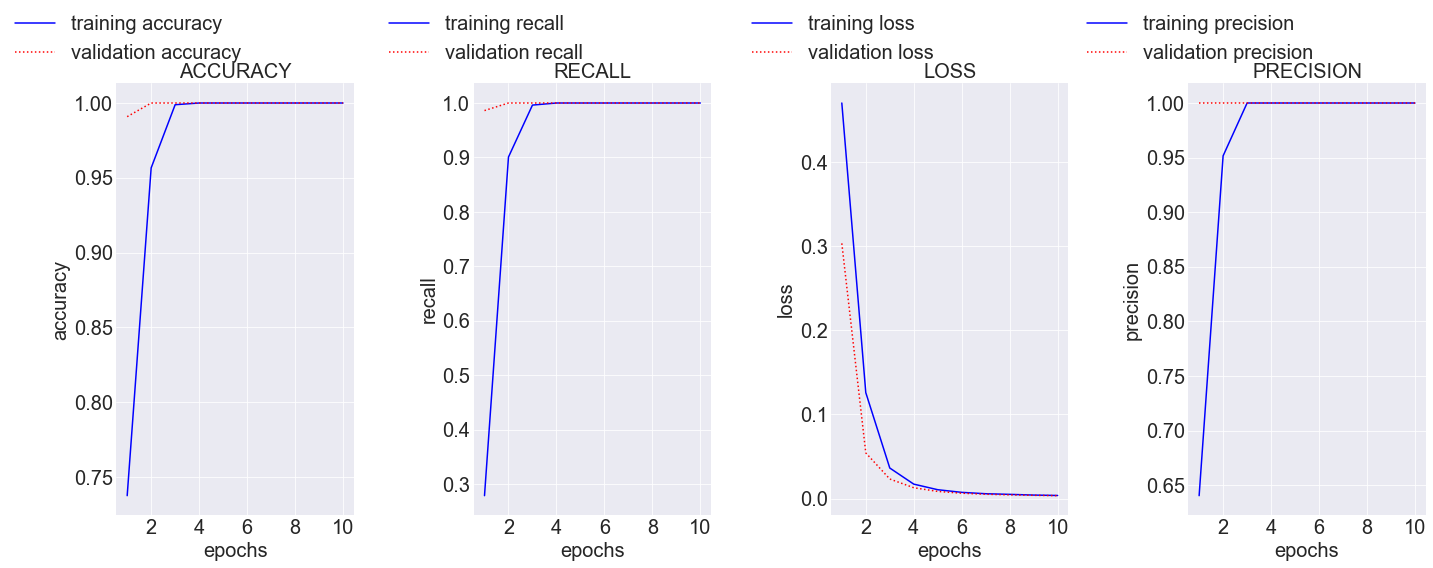

In [179]:
plot_history(history_1)


In [182]:
y_pred = model.predict(x_valid, verbose=0)
y_pred


array([[0.97324294],
       [0.9732752 ],
       [0.9731732 ],
       [0.973184  ],
       [0.9732736 ],
       [0.9733049 ],
       [0.02795553],
       [0.02789569],
       [0.02794492],
       [0.02783284],
       [0.02792636],
       [0.02791682],
       [0.9732247 ],
       [0.9732516 ],
       [0.973245  ],
       [0.97325814],
       [0.9732437 ],
       [0.97338784],
       [0.9732422 ],
       [0.973238  ],
       [0.97324115],
       [0.9732261 ],
       [0.973195  ],
       [0.97320044],
       [0.97320914],
       [0.97318804],
       [0.9731901 ],
       [0.9731817 ],
       [0.9731853 ],
       [0.97318375],
       [0.9732073 ],
       [0.0279572 ],
       [0.02796036],
       [0.02795503],
       [0.02795142],
       [0.9732567 ],
       [0.97319984],
       [0.97326505],
       [0.97327745],
       [0.97330797],
       [0.9733    ],
       [0.9732971 ],
       [0.9732555 ],
       [0.97326434],
       [0.9732634 ],
       [0.97330654],
       [0.9733137 ],
       [0.973

In [224]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64, kernel_size=(2,) ,input_shape=(n_steps, n_features)),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Conv1D(filters=64, kernel_size=( 2,), kernel_regularizer='l1'),
    tf.keras.layers.LeakyReLU(alpha=0.5),
    tf.keras.layers.Dense(units=32, activation='relu', kernel_regularizer='l1'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [225]:
conv_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
              loss='mse', metrics=['accuracy'])
conv_model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 63, 64)            192       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 63, 64)            0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 62, 64)            8256      
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 62, 64)            0         
_________________________________________________________________
dense_51 (Dense)             (None, 62, 32)            2080      
_________________________________________________________________
dense_52 (Dense)             (None, 62, 1)             33        
Total params: 10,561
Trainable params: 10,561
Non-trainable params: 0
_________________________________________________

In [226]:
history_2 = conv_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=10)

Epoch 1/10
88/88 [==============================] - 0s 3ms/step - loss: 5.8127 - accuracy: 0.6655 - val_loss: 3.8406 - val_accuracy: 0.3425
Epoch 2/10
88/88 [==============================] - 0s 2ms/step - loss: 2.2542 - accuracy: 0.7009 - val_loss: 1.7310 - val_accuracy: 0.3425
Epoch 3/10
88/88 [==============================] - 0s 2ms/step - loss: 0.9822 - accuracy: 0.7009 - val_loss: 1.0725 - val_accuracy: 0.3425
Epoch 4/10
88/88 [==============================] - 0s 2ms/step - loss: 0.5943 - accuracy: 0.7009 - val_loss: 0.8592 - val_accuracy: 0.3425
Epoch 5/10
88/88 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.6831 - val_loss: 0.7923 - val_accuracy: 0.3425
Epoch 6/10
88/88 [==============================] - 0s 2ms/step - loss: 0.3932 - accuracy: 0.6981 - val_loss: 0.6754 - val_accuracy: 0.3425
Epoch 7/10
88/88 [==============================] - 0s 2ms/step - loss: 0.3321 - accuracy: 0.6793 - val_loss: 0.7013 - val_accuracy: 0.3425
Epoch 8/10
88/88 [==

In [227]:
best_score = max(history_1.history['accuracy'])
print(best_score)

1.0


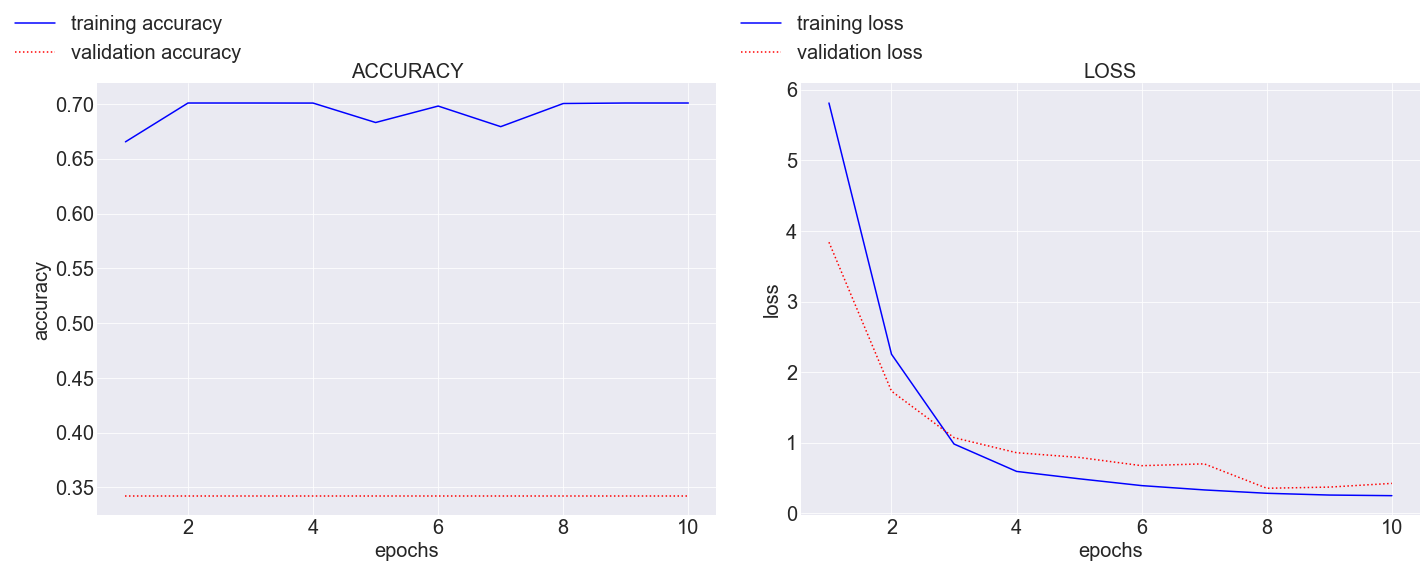

In [228]:
plot_history(history_2)

In [229]:
y_pred_1 = conv_model.predict(x_valid, verbose=0)
y_pred_1

array([[[1.9454779e-05],
        [4.6669498e-05],
        [4.1520596e-04],
        ...,
        [2.3014081e-01],
        [3.4161478e-02],
        [2.4329394e-02]],

       [[1.9454779e-05],
        [4.6669498e-05],
        [4.3013692e-04],
        ...,
        [2.2887757e-01],
        [3.4040570e-02],
        [2.4329394e-02]],

       [[1.9454779e-05],
        [4.6669498e-05],
        [4.0093064e-04],
        ...,
        [1.9589275e-01],
        [3.2592326e-02],
        [2.4329394e-02]],

       ...,

       [[1.9454779e-05],
        [4.6669498e-05],
        [4.0683150e-04],
        ...,
        [2.3786366e-01],
        [3.4412265e-02],
        [2.4329394e-02]],

       [[1.9454779e-05],
        [4.6669498e-05],
        [4.3168664e-04],
        ...,
        [2.3620740e-01],
        [3.4354746e-02],
        [2.4329394e-02]],

       [[1.7931301e-05],
        [4.6669498e-05],
        [4.4181943e-04],
        ...,
        [2.2039413e-01],
        [3.3762187e-02],
        [2.4329513e-02]]

In [211]:
gru_model = tf.keras.Sequential([
    tf.keras.layers.GRU(128, input_shape=(n_steps, n_features), return_sequences=True),
    tf.keras.layers.SimpleRNN(64, 'relu', kernel_regularizer='l2'),
    tf.keras.layers.Dense(1, 'sigmoid')
])


In [212]:
gru_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),
                   loss='mse', metrics=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
])

In [213]:
history_2 = gru_model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=10, batch_size=10,)

Epoch 1/10
88/88 [==============================] - 3s 35ms/step - loss: 0.7200 - accuracy: 0.7466 - precision: 0.6639 - recall: 0.3092 - val_loss: 0.5060 - val_accuracy: 0.8995 - val_precision: 1.0000 - val_recall: 0.8472
Epoch 2/10
88/88 [==============================] - 3s 30ms/step - loss: 0.3111 - accuracy: 0.9132 - precision: 0.9009 - recall: 0.7977 - val_loss: 0.2056 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 3/10
88/88 [==============================] - 3s 31ms/step - loss: 0.1404 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.1032 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 4/10
88/88 [==============================] - 3s 30ms/step - loss: 0.0773 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.0607 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 5/10
88/88 [==============================] - 3s 31ms/step - loss: 0.0474 - accuracy: 1.0000 - precisi

In [205]:
best_score = max(history_1.history['accuracy'])
print(best_score)

1.0


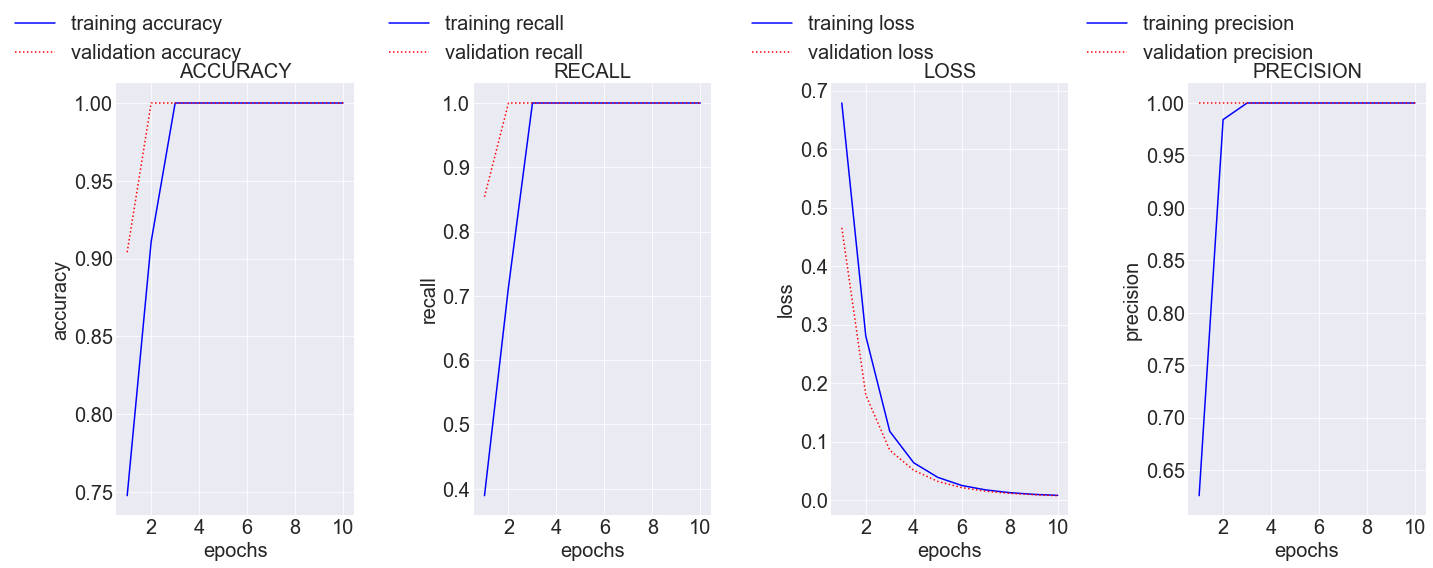

In [206]:
plot_history(history_2)

In [207]:
y_pred_2 = gru_model.predict(x_valid, verbose=0)
y_pred_2

array([[0.96076494],
       [0.96133214],
       [0.9590713 ],
       [0.95929575],
       [0.9616126 ],
       [0.9616841 ],
       [0.05330124],
       [0.05339548],
       [0.05374902],
       [0.05123907],
       [0.05418286],
       [0.05403063],
       [0.9603646 ],
       [0.9616293 ],
       [0.96110547],
       [0.9615866 ],
       [0.9612082 ],
       [0.9573624 ],
       [0.9609716 ],
       [0.9608836 ],
       [0.96080923],
       [0.960696  ],
       [0.9600631 ],
       [0.9601631 ],
       [0.96022093],
       [0.9598776 ],
       [0.9598138 ],
       [0.9596119 ],
       [0.9595354 ],
       [0.95965374],
       [0.9601246 ],
       [0.05308849],
       [0.05273202],
       [0.05316448],
       [0.05382165],
       [0.96139437],
       [0.96010286],
       [0.9614416 ],
       [0.9615693 ],
       [0.9619355 ],
       [0.96197814],
       [0.9620373 ],
       [0.9614113 ],
       [0.9611864 ],
       [0.9612041 ],
       [0.96147144],
       [0.96118397],
       [0.961